In [11]:
import pandas as pd
from collections import Counter
import csv
# import library yang di butuhkan

df = pd.read_csv('test.csv')  #membaca file csv nya 
teks = []
label = []
print(df)

                                                   Teks  label
0     [PROMO] Beli paket Flash mulai 1GB di MY TELKO...      2
1     2.5 GB/30 hari hanya Rp 35 Ribu Spesial buat A...      2
2     2016-07-08 11:47:11.Plg Yth, sisa kuota Flash ...      2
3     2016-08-07 11:29:47.Plg Yth, sisa kuota Flash ...      2
4     4.5GB/30 hari hanya Rp 55 Ribu Spesial buat an...      2
...                                                 ...    ...
7167  7) untuk tahu kapan jadwal sidang kamu cukup k...      0
7168  contoh: iteung minta jadwal sidang tipe bimbin...      0
7169  Sekedar mengingatkan untuk tahun itu formatnya...      0
7170                           Contohnya liat di poin 6      0
7171                                 To be continued...      0

[7172 rows x 2 columns]


In [12]:
with open('test.csv', newline='', encoding='utf-8') as f:
    reader = csv.reader(f)
    for row in reader:
        teks.append(row[0])
        label.append(row[1])  #setelah dokumen dibaca maka akan di append
        # Fungsi append ini berguna untuk mMenggabungkan baris teks ke akhir label (jumlah kolom harus sama) 

In [13]:
df.iloc[-1, :]

# untuk iloc() karena dia akan memilih data berdasarkan index,

Teks     To be continued...
label                     0
Name: 7171, dtype: object

In [14]:
print("jumlah data:{}".format(len(teks)))  #mengidentifikasi dan mengetahui seberapa panjang jumlah item pada objek
print(Counter(df.columns))

jumlah data:7173
Counter({'Teks': 1, 'label': 1})


In [15]:
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
teks[-1] = label[-1].format(lambda x: [item for item in x if item not in stop_words])

# untuk mengidentifikasi pada kata umum yang biasanya muncul dalam jumlah besar dan dianggap tidak memiliki makna.

In [16]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')

data="nanti ketemu dimana?"
words = word_tokenize(data)
ps = PorterStemmer()
for w in words:
    rootWord=ps.stem(w)
    print(rootWord)

# Proses stemming antara satu bahasa dengan bahasa yang lain tentu berbeda. 
# Contohnya pada teks berbahasa inggris, proses yang diperlukan hanya proses menghilangkan sufiks. 
# Sedangkan pada teks berbahasa Indonesia semua kata imbuhan baik itu sufiks dan prefiks juga dihilangkan.

nanti
ketemu
dimana
?


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AKU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [33]:
import pandas as pd
stem_word = pd.read_csv('./test.csv')
stem_word = stem_word.sort_values(by=['Teks'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(stem_word['Teks'], stem_word['label'], test_size=0.2, random_state=111)
print("Data training:")
print(len(X_train))
print("Data testing:")
print(len(X_test))

# dari kalimat teks yang telah di stim maka akan data akan di latih dengan train test split
# Setelah itu, kita bagi dataset menjadi data training dan data test dengan proporsi data test sebesar 20%
# lalu akan di pisah mana data hasil dari percobaan ini adalah 5737 data yang di train dan 1435 test

Data training:
5737
Data testing:
1435


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
text_clf = Pipeline([('vect', CountVectorizer()),
('tfidf', TfidfTransformer()),
('clf', MultinomialNB())])
text_clf.fit(X_train, y_train)

# Langkah selanjutnya adalah menggunakan pipeline untuk 
# menyatukan proses penyederhanaan data (ekstrak teks dan normalisasi data) dengan prediksi sentimen. 
# Caranya adalah menggunakan TfidfTransformer untuk mengubah suatu operasi menjadi fungsi python

# dan untuk countvectorizer berfungsi untuk menghitung frekuensi kata yang muncul pada
# kalimat dikalikan dengan frekuensi dokumen yang terdapat suatu kata yaitu tf-idf

# Berdasarkan hasil penelitian tersebut dapat
# disimpulkan bahwa menggunakan metode
# Naive Bayes Classification sangat tepat untuk
# digunakan dalam pengklasifikasian pesan teks
# pada SMS

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [36]:
print(Counter(y_train))

print(Counter(y_test))

# funsi counter pada baris ini untuk melihat hasil pembagian pada jumlah data yang di latih dan juga di test

Counter({0: 3212, 1: 2334, 2: 191})
Counter({0: 792, 1: 595, 2: 48})


In [37]:
sms_baru = ['Anda mendapatkan hadiah mobil','nanti ketemu dimana?']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [1 0]


In [38]:
sms_baru = ['Buruan, cek  di tsel.me/mytsel1 S&K']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [2]


In [39]:
sms_baru = ['Anda mendapatkan hadiah mobil']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [1]


In [40]:
sms_baru = ['nanti ketemu dimana?']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [0]


In [41]:
sms_baru = ['Tipe bimbingan tidak ada pada keyword nih...']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [1]


In [44]:
sms_baru = ['iteung panduan mahasiswa kelas']
pred = text_clf.predict(sms_baru)
print("Hasil prediksi {}".format(pred))

Hasil prediksi [0]


In [42]:
import numpy as np
pred = text_clf.predict(X_test)
akurasi = np.mean(pred==y_test)
print("Akurasi: {}".format(akurasi))

# disini terdapat hasil prediksi dari hasil pengkodean pada program di atas

Akurasi: 0.9790940766550522


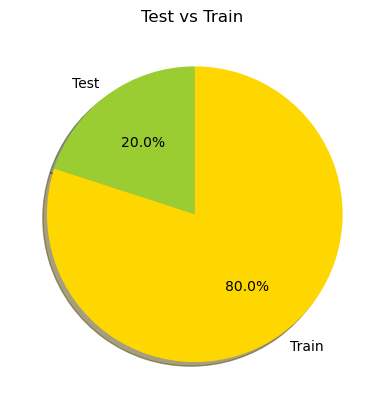

In [43]:
import matplotlib.pyplot as plt

labels = ['Test', 'Train']
quantity = [1435, 5737]
colors = ['yellowgreen', 'gold']

plt.title('Test vs Train ')
plt.pie(quantity, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

# dan ini lah persentase dari hasi nya